1. importing packages

In [89]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker

2. overall configurations

In [68]:
%matplotlib inline


tqdm.pandas()
sns.set(style='whitegrid',palette='muted')
rcParams['figure.figsize'] = 14, 10

3. Getting the Data

In [37]:
bova11 = pd.read_csv('../data/bova11.csv')
bova11.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-11-28,36.595901,36.595901,36.595901,36.595901,36.595901,0
1,2008-12-01,34.744900,34.744900,34.744900,34.744900,34.744900,0
2,2008-12-02,35.001598,35.001598,35.001598,35.001598,35.001598,0
3,2008-12-03,35.293800,35.293800,35.293800,35.293800,35.293800,0
4,2008-12-04,35.122101,35.122101,35.122101,35.122101,35.122101,0
5,2008-12-05,35.340000,35.340000,35.340000,35.340000,35.340000,0
6,2008-12-08,38.266102,38.266102,38.266102,38.266102,38.266102,0
7,2008-12-09,37.951599,37.951599,37.951599,37.951599,37.951599,0
8,2008-12-10,38.987000,38.987000,38.987000,38.987000,38.987000,0
9,2008-12-11,38.504398,38.504398,38.504398,38.504398,38.504398,0


In [38]:
len(bova11)

3411

4. Pre-processing

Adjust the columns name and type

In [39]:
bova11.columns = bova11.columns.str.lower()

In [40]:
bova11.date = pd.to_datetime(bova11.date)

In [41]:
bova11.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj close    0
volume       0
dtype: int64

Removing rows with volume 0

In [42]:
bova11 = bova11.loc[(bova11.volume != 0)].reset_index()
bova11.drop(columns='index', axis = 1, inplace = True)
bova11

,date,open,high,low,close,adj close,volume
0,2009-01-02,38.279999,40.320000,37.939999,40.320000,40.320000,119900
1,2009-01-05,40.200001,42.000000,39.700001,42.000000,42.000000,341700
2,2009-01-06,42.060001,42.320000,41.549999,42.320000,42.320000,178300
3,2009-01-07,41.750000,41.770000,40.450001,40.639999,40.639999,73400
4,2009-01-08,40.150002,42.200001,40.150002,42.200001,42.200001,195300
...,...,...,...,...,...,...,...
3292,2022-08-24,108.930000,109.900002,108.660004,109.180000,109.180000,4768594
3293,2022-08-25,109.830002,110.089996,108.830002,109.599998,109.599998,3653799
3294,2022-08-26,110.080002,110.190002,108.000000,108.360001,108.360001,6865876
3295,2022-08-29,107.910004,109.290001,107.860001,108.400002,108.400002,7305457


Sorting the data by date

In [44]:
bova11 = bova11.sort_values(by='date').reset_index(drop=True)

,date,open,high,low,close,adj close,volume
0,2009-01-02,38.279999,40.320000,37.939999,40.320000,40.320000,119900
1,2009-01-05,40.200001,42.000000,39.700001,42.000000,42.000000,341700
2,2009-01-06,42.060001,42.320000,41.549999,42.320000,42.320000,178300
3,2009-01-07,41.750000,41.770000,40.450001,40.639999,40.639999,73400
4,2009-01-08,40.150002,42.200001,40.150002,42.200001,42.200001,195300
...,...,...,...,...,...,...,...
3292,2022-08-24,108.930000,109.900002,108.660004,109.180000,109.180000,4768594
3293,2022-08-25,109.830002,110.089996,108.830002,109.599998,109.599998,3653799
3294,2022-08-26,110.080002,110.190002,108.000000,108.360001,108.360001,6865876
3295,2022-08-29,107.910004,109.290001,107.860001,108.400002,108.400002,7305457


Adding a column with the previous close value

In [46]:
bova11["prev_close"] = bova11.shift(1)["close"]

In [47]:
bova11.head()

,date,open,high,low,close,adj close,volume,prev_close
0,2009-01-02,38.279999,40.320000,37.939999,40.320000,40.320000,119900,NaN
1,2009-01-05,40.200001,42.000000,39.700001,42.000000,42.000000,341700,40.320000
2,2009-01-06,42.060001,42.320000,41.549999,42.320000,42.320000,178300,42.000000
3,2009-01-07,41.750000,41.770000,40.450001,40.639999,40.639999,73400,42.320000
4,2009-01-08,40.150002,42.200001,40.150002,42.200001,42.200001,195300,40.639999


Adding the close difference between dates

In [52]:
bova11["close_change"]= bova11.progress_apply(
    lambda row: 0 if np.isnan(row.prev_close) else row.close - row.prev_close,
    axis = 1
)

100%|██████████| 3297/3297 [00:00<00:00, 26864.37it/s]


In [53]:
bova11.head()

,date,open,high,low,close,adj close,volume,prev_close,close_change
0,2009-01-02,38.279999,40.320000,37.939999,40.320000,40.320000,119900,NaN,0.000000
1,2009-01-05,40.200001,42.000000,39.700001,42.000000,42.000000,341700,40.320000,1.680000
2,2009-01-06,42.060001,42.320000,41.549999,42.320000,42.320000,178300,42.000000,0.320000
3,2009-01-07,41.750000,41.770000,40.450001,40.639999,40.639999,73400,42.320000,-1.680001
4,2009-01-08,40.150002,42.200001,40.150002,42.200001,42.200001,195300,40.639999,1.560002


Checking the dataseries over time

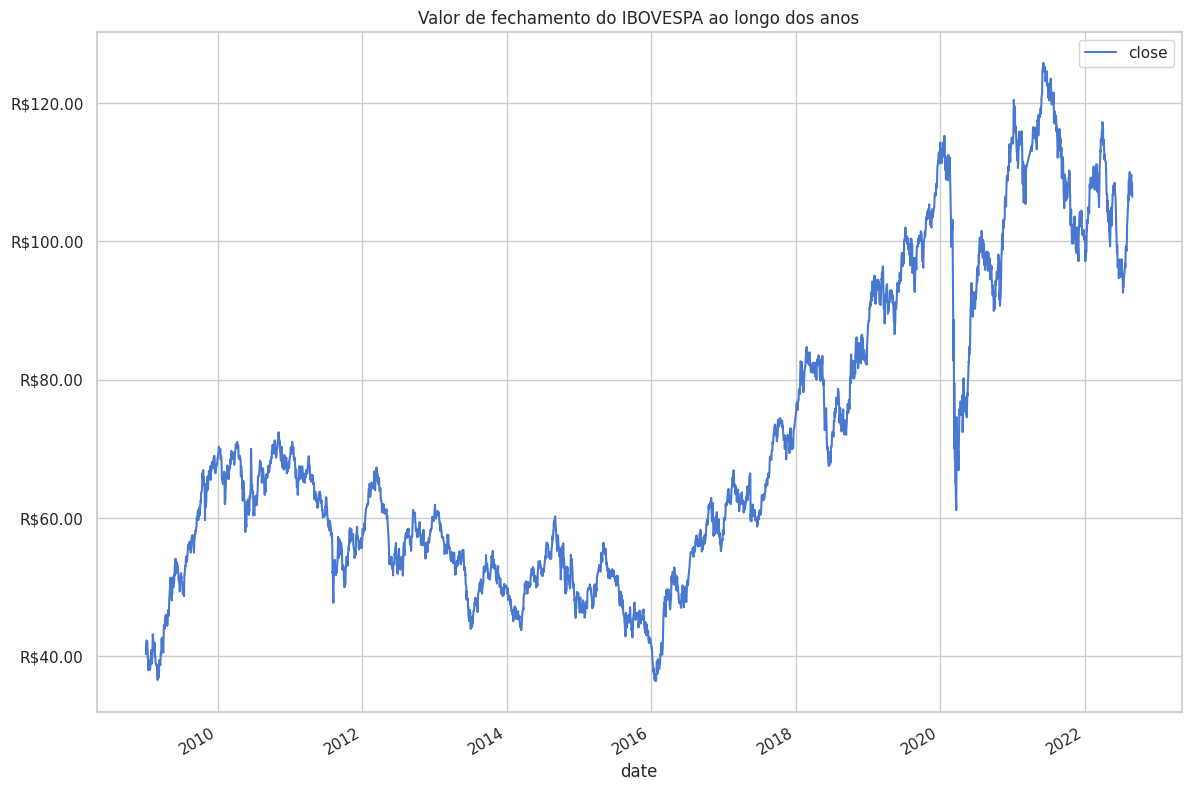

In [92]:
daily_closing = bova11[['date','close']]
daily_closing = daily_closing.set_index('date')
ax = daily_closing.plot()
plt.title('Valor de fechamento do IBOVESPA ao longo dos anos')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))

Adding moving average for 3, 10 and 30 Days

In [129]:
bova11['ma_3d'] = bova11['close'].rolling(3, center = True, min_periods=1).mean()
bova11['ma_10d'] = bova11['close'].rolling(10, center = True,min_periods=1).mean()
bova11['ma_30d'] = bova11['close'].rolling(30, center=True, min_periods=1).mean()

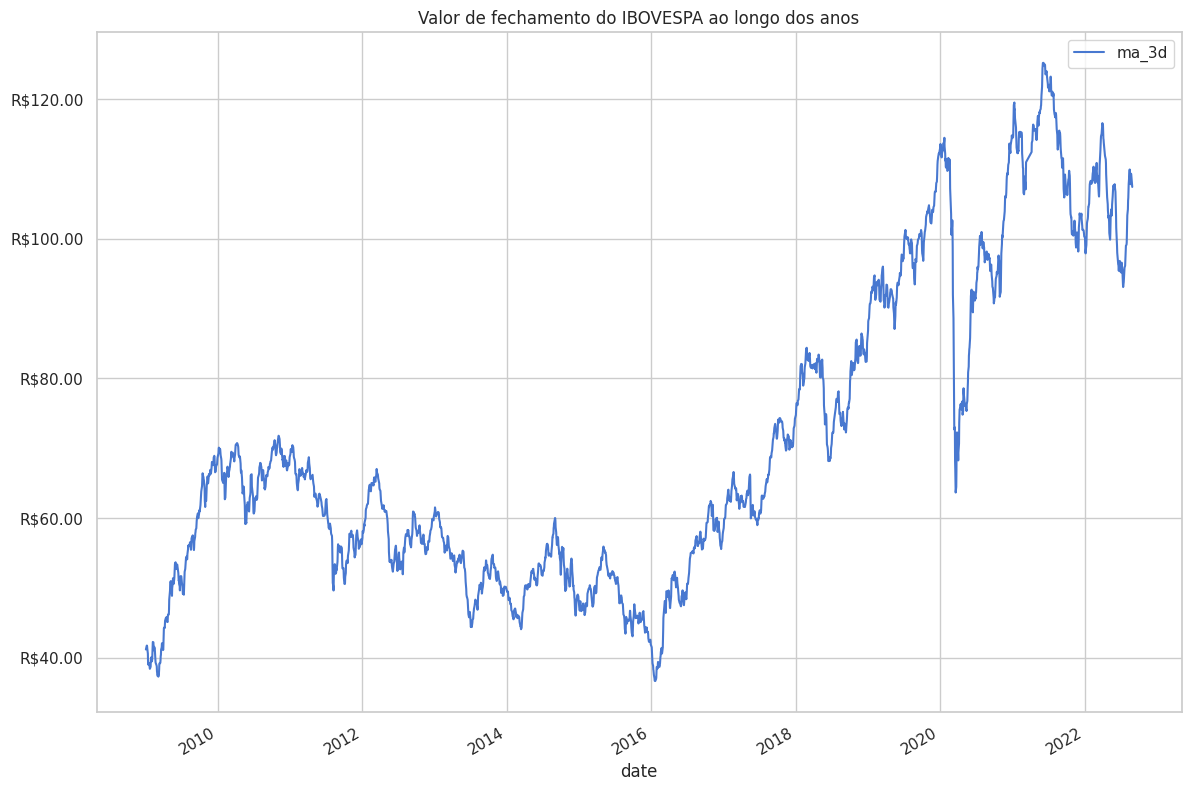

In [134]:
moving_avg = bova11[['date','ma_3d']]
moving_avg = moving_avg.set_index('date')
ax = moving_avg.plot()
plt.title('Valor de fechamento do IBOVESPA ao longo dos anos')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))

In [131]:
bova11.head()

,date,open,high,low,close,adj close,volume,prev_close,close_change,ma_3d,ma_10d,ma_30d
0,2009-01-02,38.279999,40.320000,37.939999,40.320000,40.320000,119900,NaN,0.000000,41.160000,41.496000,40.072667
1,2009-01-05,40.200001,42.000000,39.700001,42.000000,42.000000,341700,40.320000,1.680000,41.546667,41.580000,39.948125
2,2009-01-06,42.060001,42.320000,41.549999,42.320000,42.320000,178300,42.000000,0.320000,41.653333,41.311429,39.892353
3,2009-01-07,41.750000,41.770000,40.450001,40.639999,40.639999,73400,42.320000,-1.680001,41.720000,41.147500,39.842223
4,2009-01-08,40.150002,42.200001,40.150002,42.200001,42.200001,195300,40.639999,1.560002,41.613333,40.801111,39.897895


Select the features 

In [135]:
rows = []

for _, row in tqdm(bova11.iterrows(), total = bova11.shape[0]):
    row_data = dict(
        open = row.open,
        high = row.high,
        low = row.low,
        close = row.close,
        close_change = row.close_change,
        ma_3d = row.ma_3d,
        ma_10d = row.ma_10d,
        ma_30d = row.ma_30d
    )

    rows.append(row_data)

features_df = pd.DataFrame(rows)

100%|██████████| 3297/3297 [00:00<00:00, 7128.45it/s]


In [136]:
features_df.head()

,open,high,low,close,close_change,ma_3d,ma_10d,ma_30d
0,38.279999,40.320000,37.939999,40.320000,0.000000,41.160000,41.496000,40.072667
1,40.200001,42.000000,39.700001,42.000000,1.680000,41.546667,41.580000,39.948125
2,42.060001,42.320000,41.549999,42.320000,0.320000,41.653333,41.311429,39.892353
3,41.750000,41.770000,40.450001,40.639999,-1.680001,41.720000,41.147500,39.842223
4,40.150002,42.200001,40.150002,42.200001,1.560002,41.613333,40.801111,39.897895


In [139]:
features_df.shape

(3297, 8)

In [140]:
train_size = int(len(features_df) * 0.9)
train_size

2967

In [141]:
train_df, test_df = features_df[:train_size], features_df[train_size + 1:]
train_df.shape, test_df.shape

((2967, 8), (329, 8))

In [142]:
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler = scaler.fit(train_df)

In [143]:
train_df = pd.DataFrame(
    scaler.transform(train_df),
    index = train_df.index,
    columns=train_df.columns
)

In [146]:
train_df.head()

,open,high,low,close,close_change,ma_3d,ma_10d,ma_30d
0,-0.359009,-0.911719,-0.946644,-0.907802,0.120375,-0.890811,-0.890040,-0.958679
1,-0.326859,-0.871743,-0.904153,-0.867778,0.277752,-0.881477,-0.887956,-0.961871
2,-0.295713,-0.864129,-0.859488,-0.860155,0.150351,-0.878902,-0.894619,-0.963300
3,-0.300904,-0.877216,-0.886045,-0.900179,-0.037002,-0.877293,-0.898686,-0.964585
4,-0.327696,-0.866984,-0.893288,-0.863014,0.266511,-0.879868,-0.907280,-0.963158
